# Instacart_market_basket_analysis

This notebook contains an exploratory data analysis (EDA) of the Instacart dataset, which includes 3 million grocery orders from more than 200,000 Instacart users. 

Instacart is an online grocery delivery service. This analysis aims to explore the dataset to understand customer behavior, identify patterns, and provide actionable insights that can help in enhancing the customer experience and optimizing operations.

### Data Preprocessing

#### Importing Packages

1) Pandas is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
2) NumPy is a Python library used for working with arrays
3) Matplotlib is a low level graph plotting library in python that serves as a visualization utility. 
4) Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [8]:
# to suppress warning messages that might be displayed during the execution of code for sake of clean output
import warnings
#warning filter in Python handles warnings (presented, disregarded or raised to exceptions)
warnings.filterwarnings('ignore')
# “ignore” Never display warnings which match

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# relax the limitation of data display by using set_option()

#### Reading Files and Getting an Overview of Files Related to Instacart Market Basket Analysis

What are the first few steps we are doing to get an overview of each file?
1) Load the CSV file
2) Use file_name.head(), file_name.tail() -> to view top 5 and bottom 5 rows of dataframe
3) Use file_name.info() -> it provides essential details such as the total number of non-null values, data types of each column, and memory usage
4) Use file_name.describe(include = all) -> Generates descriptive statistics for numeric columns, such as count, mean, standard deviation, minimum, maximum, and quartiles
5) Use file_name.shape -> Returns the dimensions of the DataFrame
6) Use file_name.columns -> Return the column names of the DataFrame
7) Use file_name.dtypes -> Returns the data types of each column
8) Use file_name['column_name'].value_counts() -> Returns a Series containing counts of unique values for a specified column
9) Use file_name['column_name'].unique() -> Returns the unique values in a specified column
10) Use file_name.nunique() -> Returns the number of unique values in each column
11) Use file_name.isnull().sum() -> number of missing values in each column

###### explanation of order_products__SET(prior,test,train)

1) all orders prior to most recent order of every user_id are evaluated as prior in orders (3421083-206209) = 3214874
2) For 206209 users the most recent orders would be 206209 which are evaluated into train and test in ratio of ~ 7/4

##### Load and Overview of aisles.csv

In [15]:
aisles = pd.read_csv("/Users/vythreynarayanam/Downloads/DA Consultancy/Instacart_Market_Basket_EDA_Python/aisles.csv")

In [16]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [17]:
aisles.tail()

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [18]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [19]:
aisles.describe(include = "all")

,aisle_id,aisle
count,134.000000,134
unique,NaN,134
top,NaN,specialty wines champagnes
freq,NaN,1
mean,67.500000,NaN
std,38.826537,NaN
min,1.000000,NaN
25%,34.250000,NaN
50%,67.500000,NaN
75%,100.750000,NaN


In [20]:
aisles.shape

(134, 2)

In [21]:
aisles.columns

Index(['aisle_id', 'aisle'], dtype='object')

In [22]:
aisles.dtypes

aisle_id     int64
aisle       object
dtype: object

In [23]:
aisles['aisle'].value_counts()

aisle
specialty wines champagnes       1
prepared soups salads            1
specialty cheeses                1
energy granola bars              1
instant foods                    1
marinades meat preparation       1
frozen dessert                   1
yogurt                           1
cereal                           1
meat counter                     1
packaged vegetables fruits       1
spirits                          1
trail mix snack mix              1
feminine care                    1
packaged seafood                 1
fresh herbs                      1
baking ingredients               1
bulk dried fruits vegetables     1
oils vinegars                    1
oral hygiene                     1
packaged cheese                  1
hair care                        1
popcorn jerky                    1
fresh fruits                     1
soap                             1
coffee                           1
beers coolers                    1
red wines                        1
honeys syrups 

In [24]:
aisles['aisle'].unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

In [25]:
aisles.nunique()

aisle_id    134
aisle       134
dtype: int64

In [26]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

##### Load and Overview of departments.csv

In [28]:
departments = pd.read_csv("/Users/vythreynarayanam/Downloads/DA Consultancy/Instacart_Market_Basket_EDA_Python/departments.csv")

In [29]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [30]:
departments.tail()

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [31]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [32]:
departments.describe(include = "all")

,department_id,department
count,21.000000,21
unique,NaN,21
top,NaN,frozen
freq,NaN,1
mean,11.000000,NaN
std,6.204837,NaN
min,1.000000,NaN
25%,6.000000,NaN
50%,11.000000,NaN
75%,16.000000,NaN


In [33]:
departments.shape

(21, 2)

In [34]:
departments.columns

Index(['department_id', 'department'], dtype='object')

In [35]:
departments.dtypes

department_id     int64
department       object
dtype: object

In [36]:
departments.value_counts()

department_id  department     
1              frozen             1
2              other              1
3              bakery             1
4              produce            1
5              alcohol            1
6              international      1
7              beverages          1
8              pets               1
9              dry goods pasta    1
10             bulk               1
11             personal care      1
12             meat seafood       1
13             pantry             1
14             breakfast          1
15             canned goods       1
16             dairy eggs         1
17             household          1
18             babies             1
19             snacks             1
20             deli               1
21             missing            1
Name: count, dtype: int64

In [37]:
departments.nunique()

department_id    21
department       21
dtype: int64

In [38]:
departments['department'].unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

In [39]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

##### Load and Overview of order_products__prior.csv

In [41]:
order_products__prior = pd.read_csv("/Users/vythreynarayanam/Downloads/DA Consultancy/Instacart_Market_Basket_EDA_Python/order_products__prior.csv")

In [42]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [43]:
order_products__prior.tail()

,order_id,product_id,add_to_cart_order,reordered
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [44]:
order_products__prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [45]:
order_products__prior.describe(include ='all')

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


In [46]:
order_products__prior.shape

(32434489, 4)

In [47]:
order_products__prior.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [48]:
order_products__prior.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [49]:
order_products__prior["reordered"].value_counts()

reordered
1    19126536
0    13307953
Name: count, dtype: int64

In [50]:
order_products__prior['reordered'].unique()

array([1, 0])

In [51]:
order_products__prior.nunique()

order_id             3214874
product_id             49677
add_to_cart_order        145
reordered                  2
dtype: int64

In [52]:
order_products__prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

##### Load and Overview of order_products__train.csv

In [54]:
order_products__train = pd.read_csv("/Users/vythreynarayanam/Downloads/DA Consultancy/Instacart_Market_Basket_EDA_Python/order_products__train.csv")

In [55]:
order_products__train.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [56]:
order_products__train.tail()

,order_id,product_id,add_to_cart_order,reordered
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1
1384616,3421070,4724,3,1


In [57]:
order_products__train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [58]:
order_products__train.describe(include = "all")

,order_id,product_id,add_to_cart_order,reordered
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,8.758044e+00,5.985944e-01
std,9.897326e+05,1.412127e+04,7.423936e+00,4.901829e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.433700e+05,1.338000e+04,3.000000e+00,0.000000e+00
50%,1.701880e+06,2.529800e+04,7.000000e+00,1.000000e+00
75%,2.568023e+06,3.794000e+04,1.200000e+01,1.000000e+00
max,3.421070e+06,4.968800e+04,8.000000e+01,1.000000e+00


In [59]:
order_products__train.shape

(1384617, 4)

In [60]:
order_products__train.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [61]:
order_products__train.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [62]:
order_products__train["add_to_cart_order"].value_counts()

add_to_cart_order
1     131209
2     124364
3     116996
4     108963
5     100745
6      91850
7      83142
8      74601
9      66618
10     59401
11     52848
12     46814
13     41431
14     36588
15     32194
16     28363
17     24841
18     21733
19     19014
20     16541
21     14439
22     12582
23     10901
24      9439
25      8147
26      7068
27      6082
28      5222
29      4543
30      3909
31      3356
32      2910
33      2507
34      2161
35      1846
36      1566
37      1356
38      1163
39       985
40       843
41       744
42       654
43       566
44       491
45       412
46       348
47       300
48       251
49       219
50       193
51       162
52       138
53       115
54        97
55        82
56        70
57        60
58        54
59        49
60        45
61        37
62        34
63        31
64        26
65        22
66        19
67        17
68        16
69        14
70        14
71        10
72        10
74         8
73         8
75         6
76     

In [63]:
order_products__train["reordered"].unique()

array([1, 0])

In [64]:
order_products__train.nunique()

order_id             131209
product_id            39123
add_to_cart_order        80
reordered                 2
dtype: int64

In [65]:
order_products__train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

##### Load and Overview of orders.csv

In [67]:
orders = pd.read_csv("/Users/vythreynarayanam/Downloads/DA Consultancy/Instacart_Market_Basket_EDA_Python/orders.csv")

In [68]:
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [69]:
orders.tail(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3421073,2307371,206209,prior,5,4,15,3.0
3421074,3186442,206209,prior,6,0,16,3.0
3421075,550836,206209,prior,7,2,13,9.0
3421076,2129269,206209,prior,8,3,17,22.0
3421077,2558525,206209,prior,9,4,15,22.0
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0
3421082,272231,206209,train,14,6,14,30.0


In [70]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [71]:
orders.describe(include = "all")

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3421083,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
unique,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,prior,NaN,NaN,NaN,NaN
freq,NaN,NaN,3214874,NaN,NaN,NaN,NaN
mean,1.710542e+06,1.029782e+05,NaN,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,NaN,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,NaN,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,NaN,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,NaN,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01


In [72]:
orders.shape

(3421083, 7)

In [73]:
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [74]:
orders.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [75]:
orders["eval_set"].value_counts()

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

In [76]:
orders['days_since_prior_order'].unique()

array([nan, 15., 21., 29., 28., 19., 20., 14.,  0., 30., 10.,  3.,  8.,
       13., 27.,  6.,  9., 12.,  7., 17., 11., 22.,  4.,  5.,  2., 23.,
       26., 25., 16.,  1., 18., 24.])

In [77]:
orders["days_since_prior_order"].value_counts()

days_since_prior_order
30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: count, dtype: int64

In [78]:
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [79]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

##### Load and Overview of products.csv

In [81]:
products = pd.read_csv("/Users/vythreynarayanam/Downloads/DA Consultancy/Instacart_Market_Basket_EDA_Python/products.csv")

In [82]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [83]:
products.tail()

,product_id,product_name,aisle_id,department_id
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8
49687,49688,Fresh Foaming Cleanser,73,11


In [84]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [85]:
products.describe(include ="all")

,product_id,product_name,aisle_id,department_id
count,49688.000000,49688,49688.000000,49688.000000
unique,NaN,49688,NaN,NaN
top,NaN,Fresh Foaming Cleanser,NaN,NaN
freq,NaN,1,NaN,NaN
mean,24844.500000,NaN,67.769582,11.728687
std,14343.834425,NaN,38.316162,5.850410
min,1.000000,NaN,1.000000,1.000000
25%,12422.750000,NaN,35.000000,7.000000
50%,24844.500000,NaN,69.000000,13.000000
75%,37266.250000,NaN,100.000000,17.000000


In [86]:
products.shape

(49688, 4)

In [87]:
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [88]:
products.dtypes

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [89]:
products['aisle_id'].value_counts()

aisle_id
100    1258
45     1246
37     1091
47     1038
120    1026
107     989
94      894
21      891
38      880
61      874
3       832
22      816
104     797
98      792
78      747
69      737
92      718
26      680
31      675
114     655
17      623
123     615
66      605
117     582
83      569
20      565
89      560
112     557
6       548
4       543
25      525
75      506
127     504
41      499
88      493
81      487
40      473
72      466
105     463
77      463
131     457
121     454
11      427
5       409
110     402
9       399
106     387
129     386
27      385
24      382
19      375
96      373
116     361
50      356
101     355
115     344
59      342
70      338
63      336
79      335
67      327
65      325
54      322
13      317
80      317
23      316
87      308
130     303
8       297
52      296
64      294
91      293
97      290
126     285
95      283
73      277
2       271
51      264
30      257
109     245
99      243
84      243
128    

In [90]:
products['department_id'].unique()

array([19, 13,  7,  1, 11, 16, 17, 18, 12,  9,  8, 14, 15,  4, 21,  6, 20,
        5,  3,  2, 10])

In [91]:
products.nunique()

product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [92]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

#### Identify and handle missing values

We have NaN in orders.csv for field days_since_prior_order. As we study the data dictionary, all latest orders are taken for each user id in eval train, test categories (206209 count). There are 206209 NaN i.e., the entries where NaN is present in column of "days_since_prior_order" is the first ever order the user placed. Also, in the link given in kaggle to get overview of data it is mentioned that reordered which are not having values can be taken as none. To get a better understanding of data refer to link: "https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2" . Thus, we replaced NaN with 0 as per the overview we got from data.

In [95]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [96]:
orders['days_since_prior_order'].replace(np.NaN, 0, inplace = True)

In [97]:
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

#### Merging Data

##### concatenate order_products__prior and order_products__train

In [100]:
order_products__prior.shape

(32434489, 4)

In [101]:
order_products__train.shape

(1384617, 4)

In [102]:
order_products = pd.concat([order_products__prior, order_products__train])

In [103]:
order_products.shape

(33819106, 4)

##### merging order_products, aisles, products, departments

In [105]:
order_product_ais_dep = pd.merge(pd.merge(pd.merge(order_products, products, on='product_id'), departments , on='department_id'),aisles, on = 'aisle_id') 

In [106]:
order_product_ais_dep.shape

(33819106, 9)

In [107]:
final_order_product_detail = pd.merge(order_product_ais_dep, orders , on='order_id', how ='left')

In [108]:
final_order_product_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   department              object 
 8   aisle                   object 
 9   user_id                 int64  
 10  eval_set                object 
 11  order_number            int64  
 12  order_dow               int64  
 13  order_hour_of_day       int64  
 14  days_since_prior_order  float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


#### Note Before Data Formatting

check if we need to do data formatting/ data normalization/ binning if required/ adding dummy variables. The above all come under data cleaning. As of now I could find only data formatting to be helpful to save space. Will perform other if I find any need in future.

#### Data Formatting helping save memory usage

Converting float64 to int64 to save space if the type is int in a column

In [113]:
for i in final_order_product_detail.select_dtypes(include = ["float64","float32"]).columns:
    if final_order_product_detail[i].apply(lambda x: x.is_integer()).all():
        final_order_product_detail[i] = final_order_product_detail[i].astype('int64')

Finding if we can change int64 to int32 to save memory usage to help file run faster

In [115]:
for i in final_order_product_detail.select_dtypes(include = "int64").columns:
    if final_order_product_detail[i].max() < 32000:
        final_order_product_detail[i] = final_order_product_detail[i].astype("int32")

Observation: We were able to save about 1GB of memory usage with help of Data Formatting when we check memory usage of data before formatting and after

Here we can actually drop add_to_cart_order as we dont use this for any of our analysis further 

In [118]:
final_order_product_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   product_id              int64 
 2   add_to_cart_order       int32 
 3   reordered               int32 
 4   product_name            object
 5   aisle_id                int32 
 6   department_id           int32 
 7   department              object
 8   aisle                   object
 9   user_id                 int64 
 10  eval_set                object
 11  order_number            int32 
 12  order_dow               int32 
 13  order_hour_of_day       int32 
 14  days_since_prior_order  int32 
dtypes: int32(8), int64(3), object(4)
memory usage: 2.8+ GB


In [119]:
final_order_product_detail.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
department                0
aisle                     0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [120]:
final_order_product_detail.duplicated().sum()

0

In [121]:
final_order_product_detail.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,202279,prior,3,5,9,8
1,26,33120,5,0,Organic Egg Whites,86,16,dairy eggs,eggs,153404,prior,2,0,16,7
2,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs,eggs,23750,prior,11,6,8,10
3,327,33120,5,1,Organic Egg Whites,86,16,dairy eggs,eggs,58707,prior,21,6,9,8
4,390,33120,28,1,Organic Egg Whites,86,16,dairy eggs,eggs,166654,prior,48,0,12,9


### Descriptive Analytics

reference to get deep understanding of graphs that we can plot with matplotlib (https://www.geeksforgeeks.org/matplotlib-tutorial/?ref=lbp)

#### Busiest day of the week 

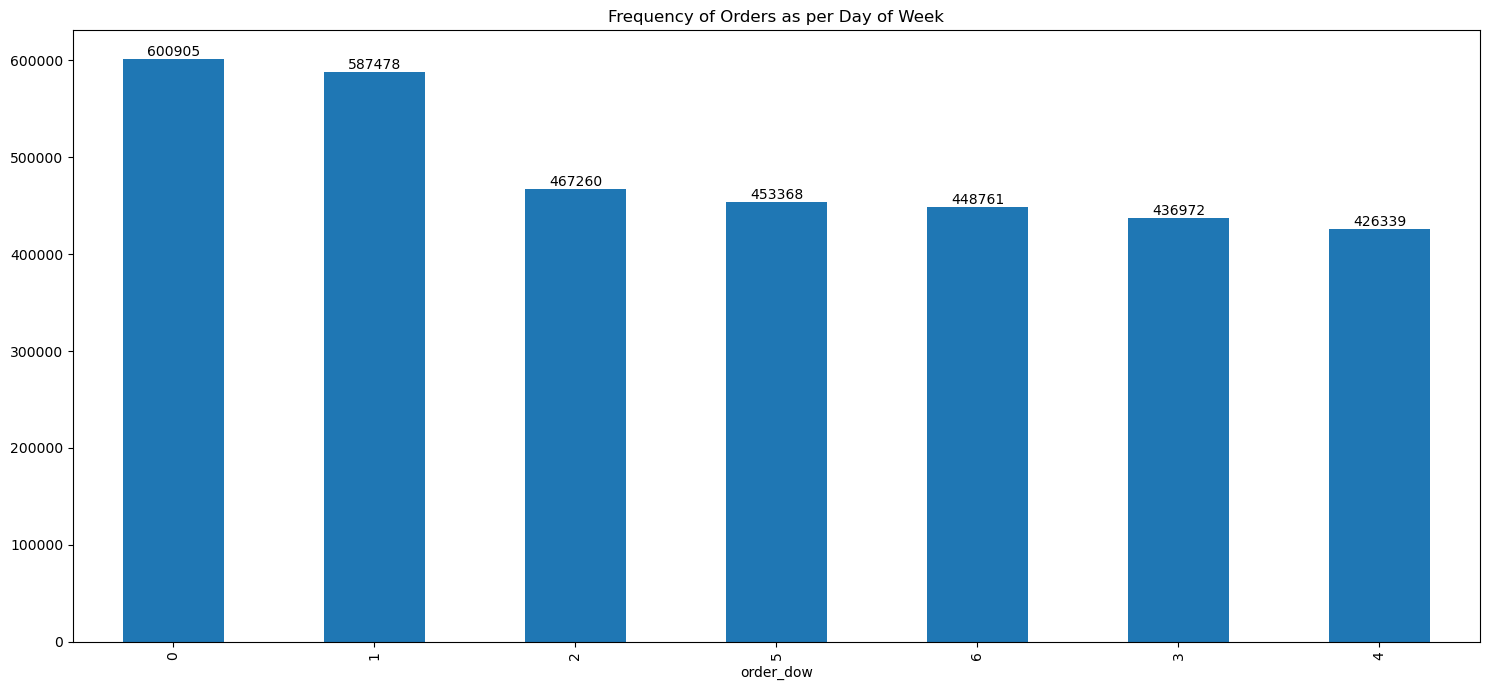

In [125]:
plt.figure(figsize=(15, 7))
graph_for_dow = orders['order_dow'].value_counts().plot(kind='bar')
plt.title("Frequency of Orders as per Day of Week")
graph_for_dow.bar_label(graph_for_dow.containers[0], label_type='edge');

#https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart

Above graph quotes Day of Week 0 being the most busiest day of the week followed by 1,2,5,6,3,4 in same order

#### Busiest hour of the day

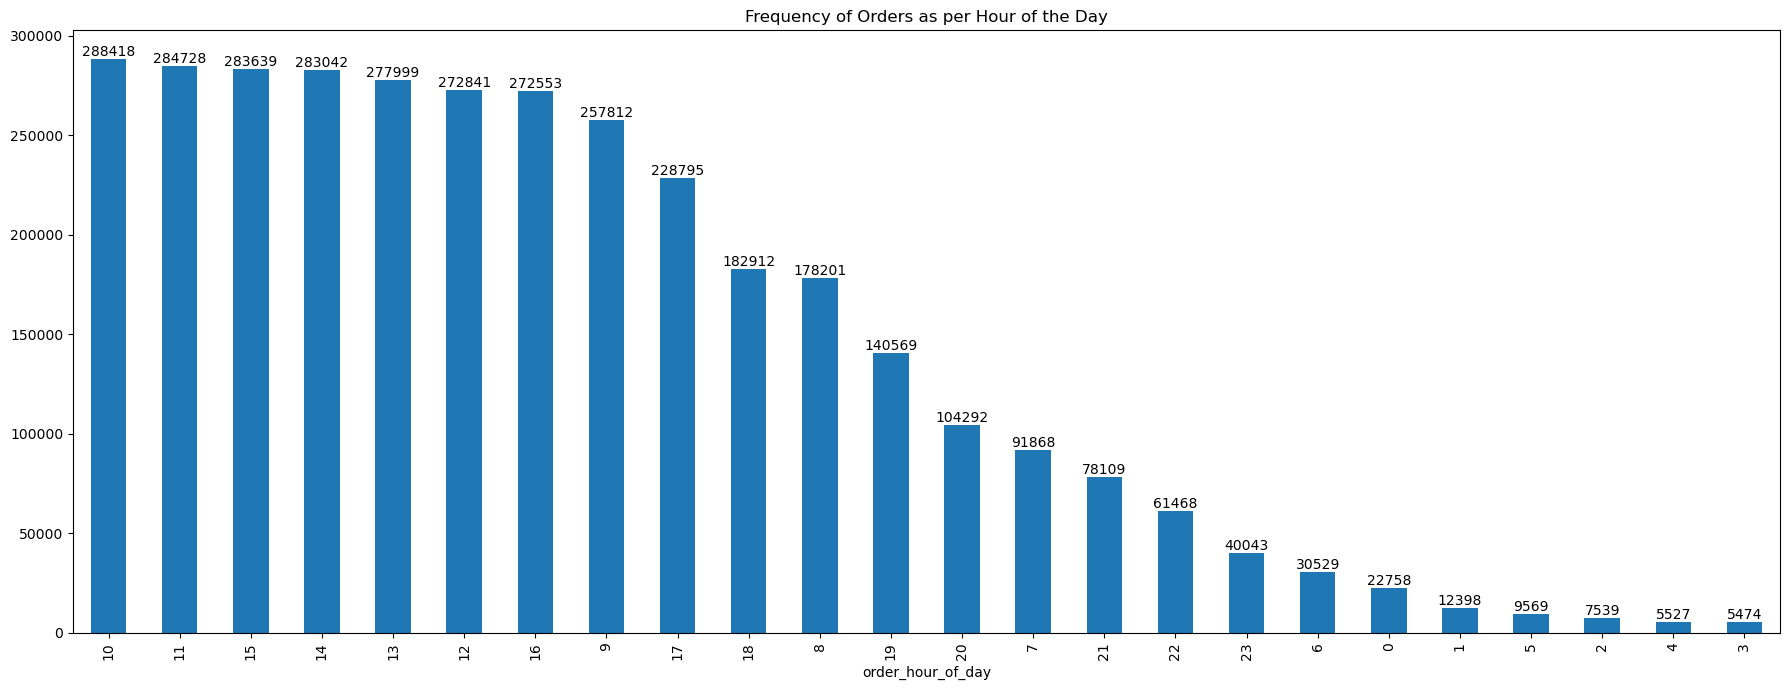

In [128]:
plt.figure(figsize=(18, 7))
graph_for_hod = orders['order_hour_of_day'].value_counts().plot(kind='bar')
plt.title("Frequency of Orders as per Hour of the Day")
graph_for_hod.bar_label(graph_for_hod.containers[0], label_type='edge');
#To suppress the output, you can add a ; at the end of the graph_label line

Above graph quotes hour of the day 10 being the most busiest hour of the day followed by 11,15,14, 13 in same order to mention top 5 most busiest hours of given days

#### Best seller product and Department (in terms of frequency of purchase)

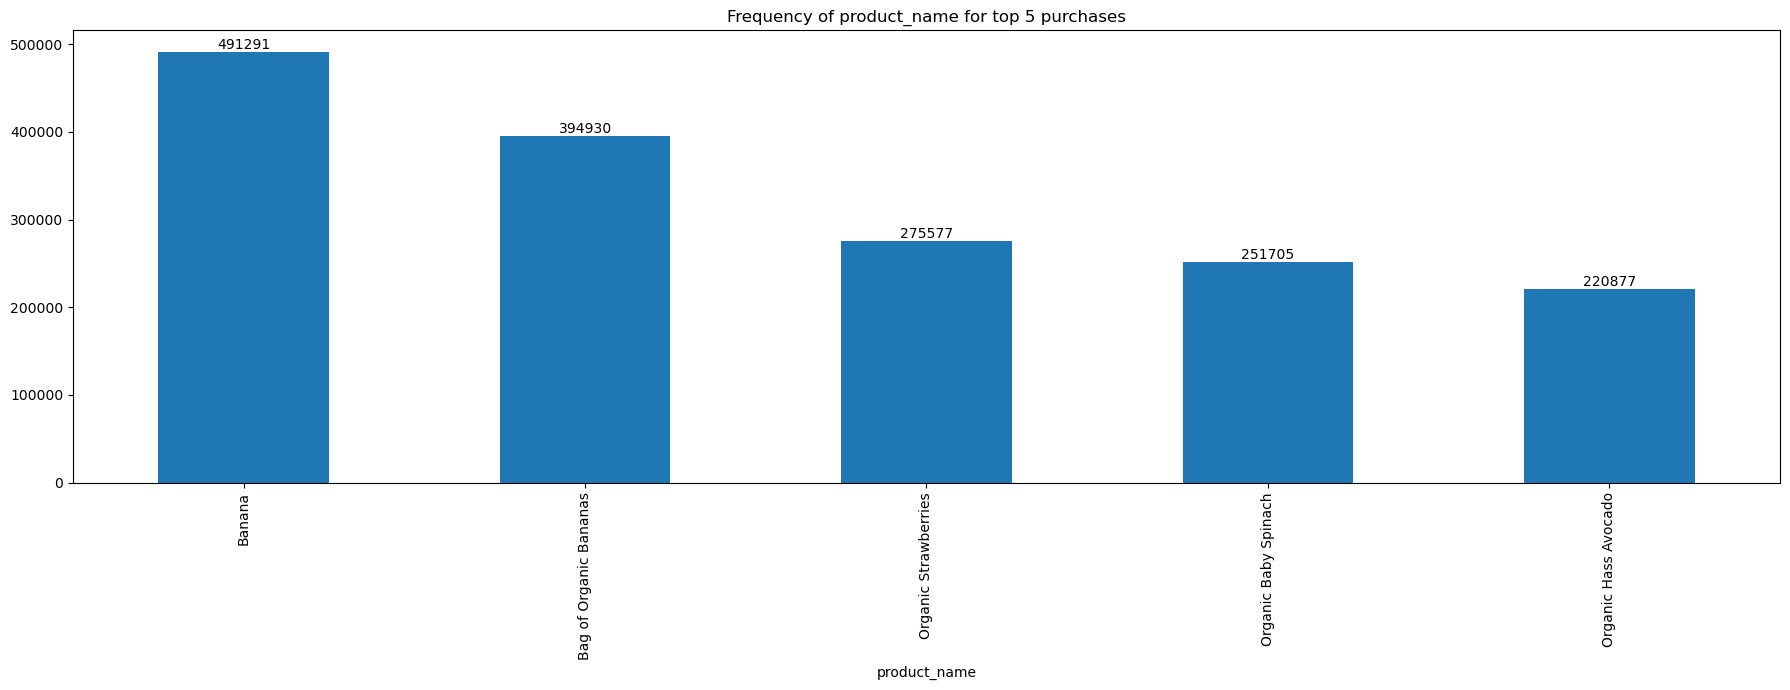

In [131]:
top_products = final_order_product_detail['product_name'].value_counts().nlargest(5)
plt.figure(figsize=(18, 7))
graph_for_products = top_products.plot(kind='bar')
plt.title("Frequency of product_name for top 5 purchases")
graph_for_products.bar_label(graph_for_products.containers[0], label_type='edge');

Most products bought by users in given data base are Banana, Bag of Organic Bananas, Organic Strawberries

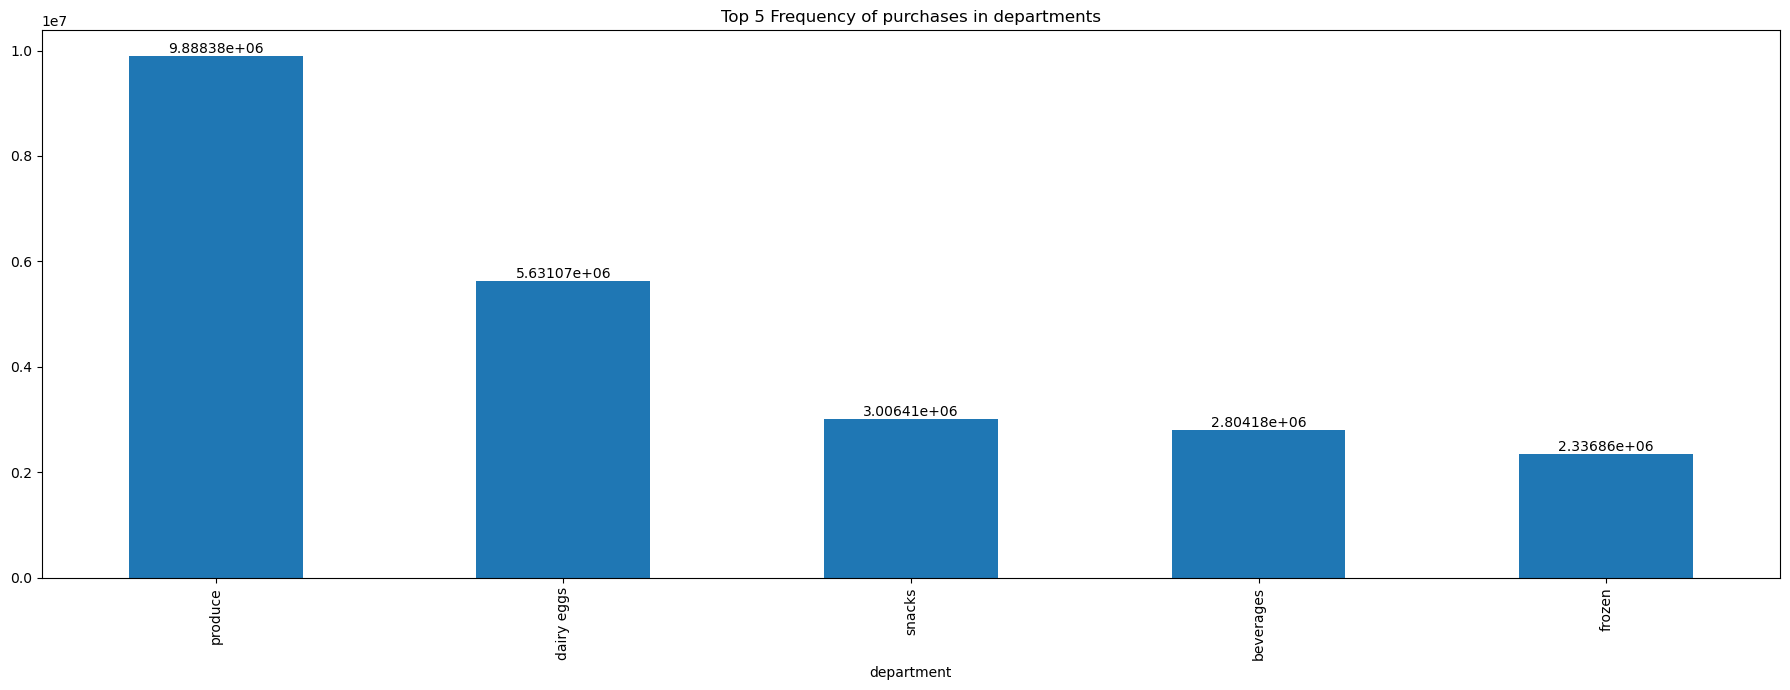

In [133]:
top_departments = final_order_product_detail['department'].value_counts().nlargest(5)
plt.figure(figsize=(18, 7))
graph_for_products = top_departments.plot(kind='bar')
plt.title("Top 5 Frequency of purchases in departments")
graph_for_products.bar_label(graph_for_products.containers[0], label_type='edge');

The departments with frequent purchase orders are produce, dairy eggs, snacks, beverages in the same order. Whereas we can clearly see the purchase made from department produce are very high compared to that of later ones.

#### Highest reorder of products

In [136]:
reordered_count_for_products = final_order_product_detail[["product_name","reordered"]]
grouped_reorders_by_products = reordered_count_for_products.groupby(["product_name"]).sum().nlargest(5,"reordered").sort_values(by="reordered", ascending=False)

<Figure size 1800x700 with 0 Axes>

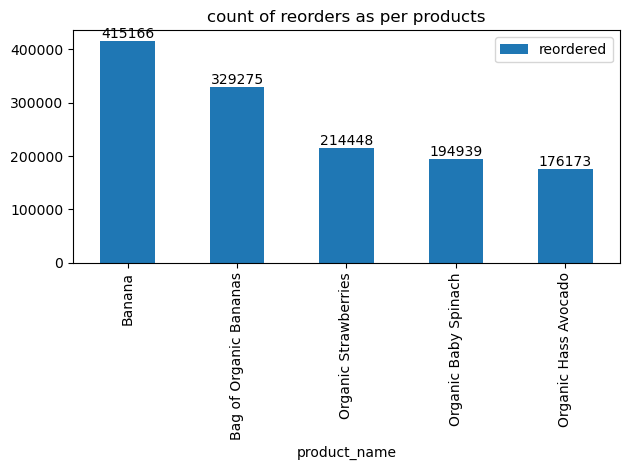

In [137]:
plt.figure(figsize=(18, 7))
graph_for_reorders = grouped_reorders_by_products.plot(kind='bar')
plt.title("count of reorders as per products")
graph_for_reorders.bar_label(graph_for_reorders.containers[0], label_type='edge');

We can see here that top 5 most purchased products are top 5 most reordered products

#### Days since customer appeared to order again from store (days_since_prior_order)

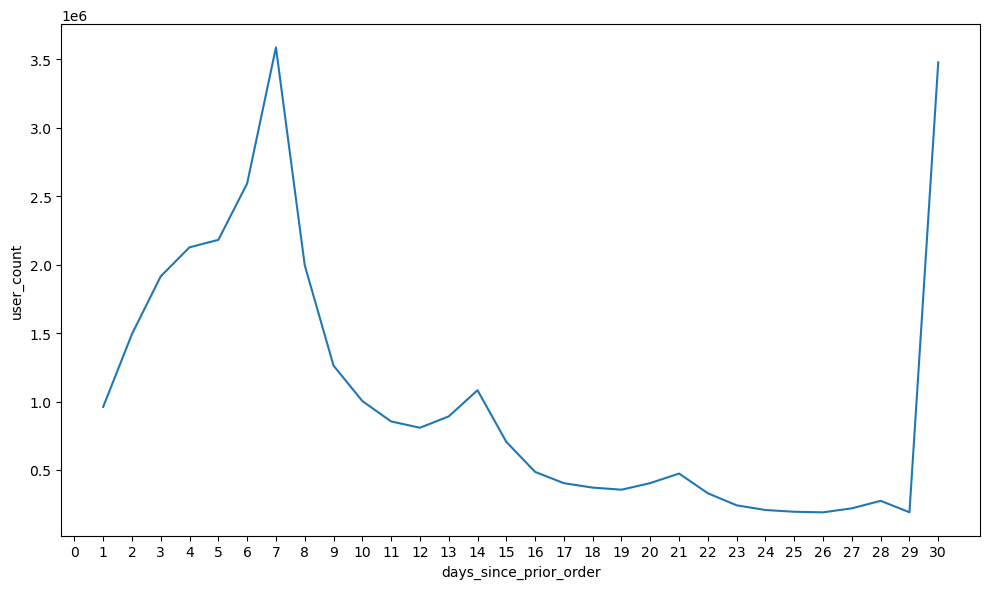

In [140]:
users_retention = final_order_product_detail[["days_since_prior_order","user_id"]]
observed_return_of_users_as_per_comeback = users_retention.groupby(["days_since_prior_order"],as_index = False).count()
observed_return_of_users_as_per_comeback.rename(columns={"user_id": "user_count"}, inplace=True)
plt.figure(figsize=(10, 6))
sns.lineplot(data=observed_return_of_users_as_per_comeback[observed_return_of_users_as_per_comeback['days_since_prior_order'] > 0], x='days_since_prior_order', y='user_count')
plt.xticks(range(0, observed_return_of_users_as_per_comeback['days_since_prior_order'].max() + 1, 1));

Not plotting 0 here since in "https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2" it is given they provided data of every user in given data from 4 to 100 order orders of total orders, that means they have had prior order for sure.

Mostly customers are repeating their order for about 5 - 9 days or 30 days of their prior orders

#### Retention1: Number of Customers vs number of orders

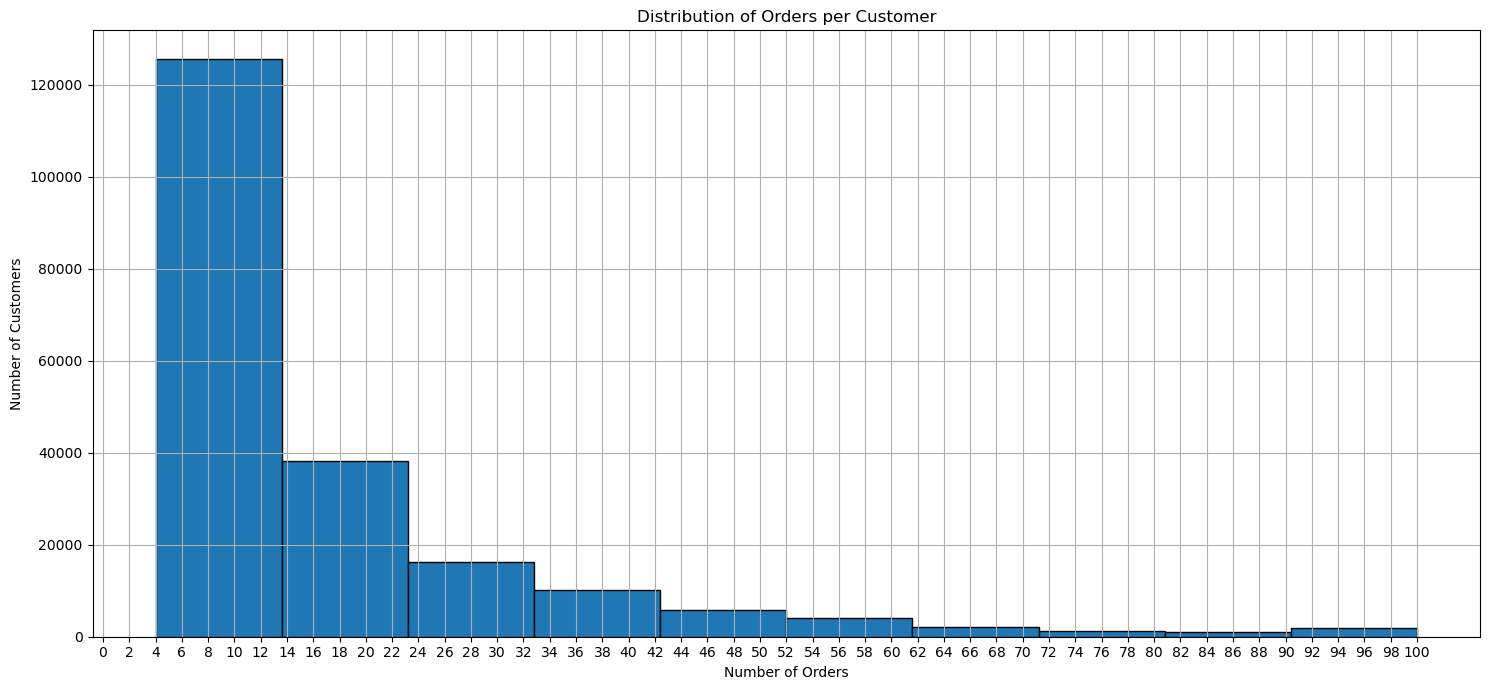

In [144]:
# Group by user_id and count unique order_id
orders_per_customer = orders.groupby('user_id')['order_id'].nunique()

# Plot the distribution
plt.figure(figsize=(15, 7))
orders_per_customer.hist(bins=10, edgecolor ="black")
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.xticks(range(0, orders_per_customer.max() + 1, 2));

From the above graph we can see that most of the customers mostly placed their orders for 4 to 12 times. As we can observe the count of customers who came to order again for more than 14 times kept on reducing for later number of orders. This might suggest us to explore are there any benefits customers are benefitting for their first few orders for about 14 such that there are only high customer number for only their first few orders orders? This can be explored futher by gathering data if any available that can help us with discounts or vouchers. We can do a survey also to gain insights from customers in this point of view.

#### Retention2: Number of products vs number of reorders

In [147]:
total_orders_for_products = final_order_product_detail.groupby('product_name')['order_id'].count().reset_index()
total_orders_for_products.columns = ['product_name', 'total_orders']
# grouped_reorders_by_products = reordered_count_for_products.groupby(["product_name"]).sum().nlargest(5,"reordered").sort_values(by="reordered", ascending=False)
# used while finding highest reordered products
# Merge with the top reordered products
top_reordered_products = grouped_reorders_by_products.merge(total_orders_for_products, on='product_name')

# Calculate reorder rate
top_reordered_products['reorder_rate'] = top_reordered_products['reordered'] / top_reordered_products['total_orders']

print(top_reordered_products)


             product_name  reordered  total_orders  reorder_rate
0                  Banana     415166        491291      0.845051
1  Bag of Organic Bananas     329275        394930      0.833755
2    Organic Strawberries     214448        275577      0.778178
3    Organic Baby Spinach     194939        251705      0.774474
4    Organic Hass Avocado     176173        220877      0.797607


We can see that reorder rate is high for top 5 reordered products that is these are highest contributed by recurring customers.

### Exploring more of Data to get insights

#### Departments to frequently stockup

We can get a better understanding of which departments have better reorders to know to assign staffing for that department or stock up as per department

In [152]:
# Calculate total orders and reorders for each department
department_reorders = final_order_product_detail.groupby('department').agg({
    'order_id': 'count',
    'reordered': 'sum'
}).reset_index()
department_reorders.columns = ['department', 'total_orders', 'total_reorders']

# Calculate reorder rate
department_reorders['reorder_rate'] = department_reorders['total_reorders'] / department_reorders['total_orders']


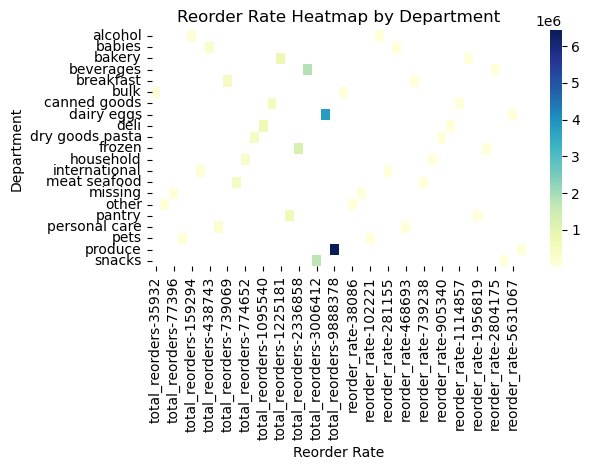

In [153]:
# Pivot the data for heatmap
heatmap_data = department_reorders.pivot(index = "department",columns = "total_orders")
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Reorder Rate Heatmap by Department')
plt.xlabel('Reorder Rate')
plt.ylabel('Department');

From above heat map we can see that departments produce, dairy eggs, beverages have high reorder rate because of which they have to consistently be on alert for stocking up

#### Days since prior order for multiple departments

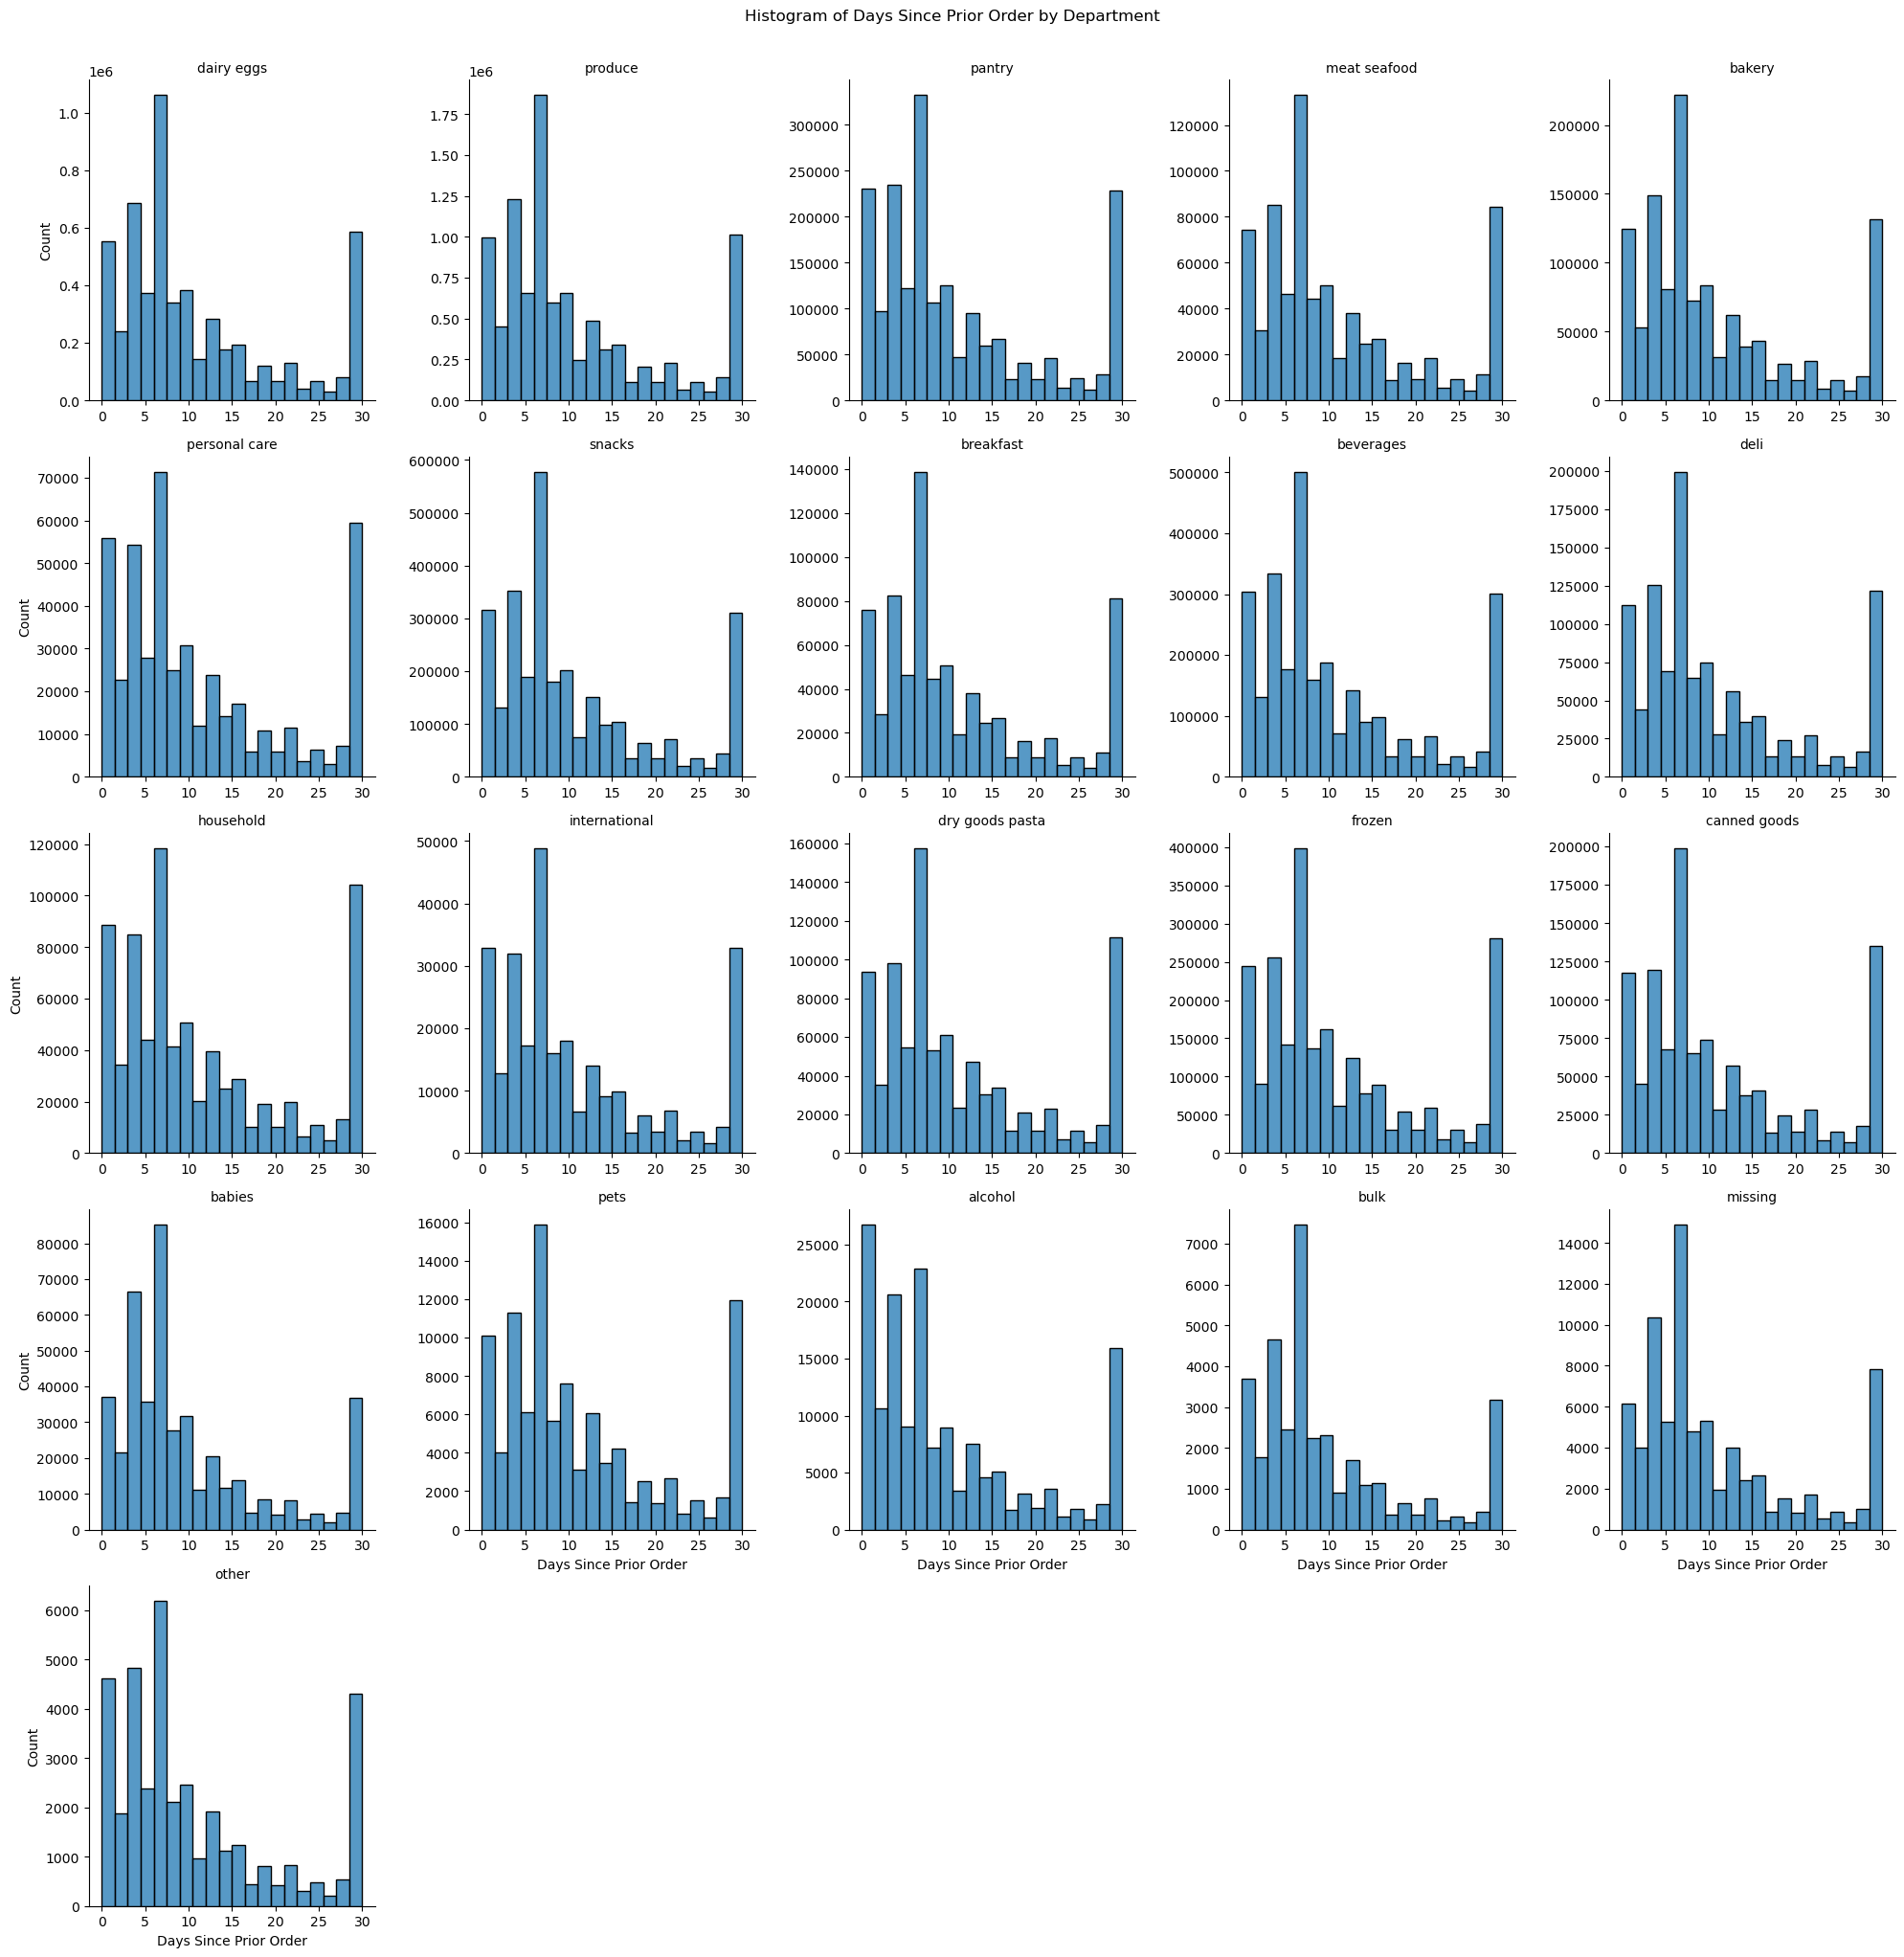

In [276]:
# Create a FacetGrid for the histogram
departments_vs_days_since_prior_order = sns.FacetGrid(final_order_product_detail, col='department', col_wrap=5, height=4, sharex=False, sharey=False)
departments_vs_days_since_prior_order.map(sns.histplot, 'days_since_prior_order', bins=20, kde=False)

# Add titles and labels
departments_vs_days_since_prior_order.fig.suptitle('Histogram of Days Since Prior Order by Department', y=1.02)
departments_vs_days_since_prior_order.set_axis_labels('Days Since Prior Order', 'Count')
departments_vs_days_since_prior_order.set_titles(col_template='{col_name}')

We can see that for most of departments days since the prior order less than 15 days, though the number of products ordered are less for few departments the pattern of days since prior order are same

#### Busiest Hour and Busiest Day together

In [159]:
#group by day of week, hour of day and find count respective to given groups and plot pivot table to thus plot a heatmap
busy_hour_day = orders[['order_hour_of_day','order_dow',"order_id"]]
busy_hour_day_group = busy_hour_day.groupby(['order_hour_of_day','order_dow'], as_index = False).count()
busy_hour_day_group_pivot = busy_hour_day_group.pivot(index = 'order_hour_of_day',columns = "order_dow")
busy_hour_day_group_pivot = busy_hour_day_group_pivot.fillna(0) #fill missing values with 0

Text(0.5, 1.0, 'heatmap of Busiest hour of a day')

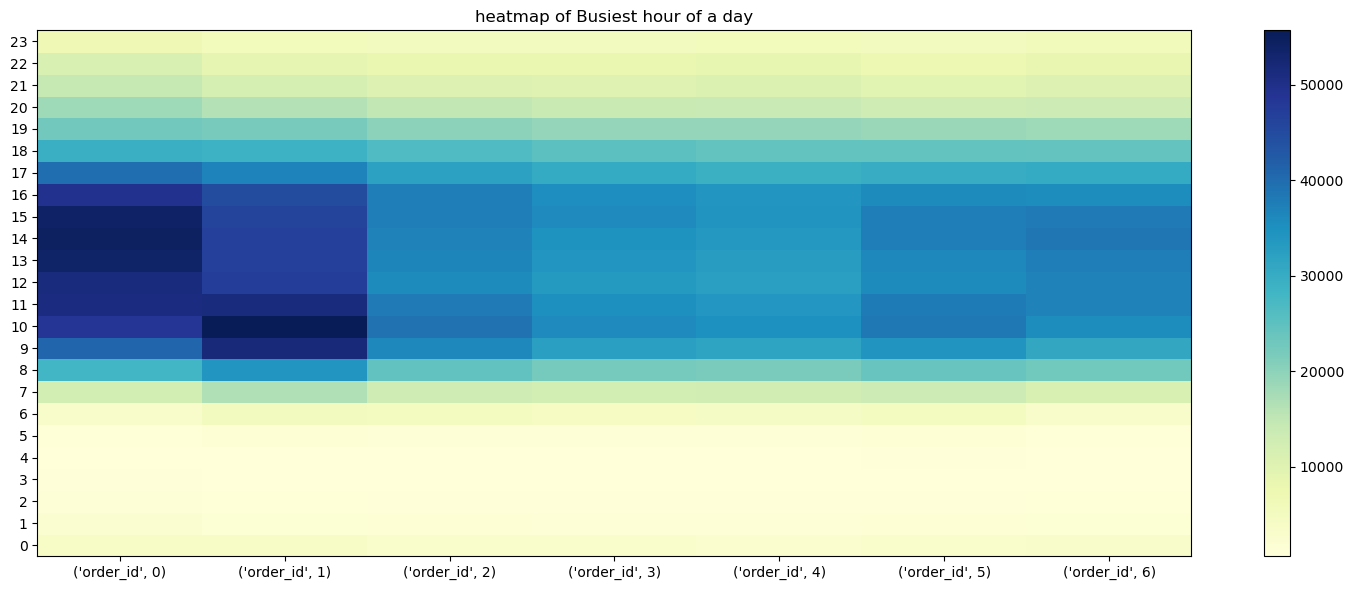

In [160]:
plt.figure(figsize=(15,6))
plt.pcolor(busy_hour_day_group_pivot,cmap ='YlGnBu')
plt.colorbar()
plt.yticks(ticks=np.arange(0.5, len(busy_hour_day_group_pivot.index), 1),labels = busy_hour_day_group_pivot.index)
plt.xticks(ticks=np.arange(0.5, len(busy_hour_day_group_pivot.columns), 1),labels = busy_hour_day_group_pivot.columns)
plt.title('heatmap of Busiest hour of a day')

We can clearly visualize from above heatmap that the hours between 9 to 18 are kind of the busy hours where the orders are high. The load can be handled as per the above statistics to help manage the flow of customer orders.

### Conclusion

This analysis provides valuable insights into customer purchasing behavior on Instacart. These insights can help in making data-driven decisions to improve customer experience and optimize inventory and operations.

1) The Busiest Hours of the grocery store range from 9:00 AM to 18:00 AM everyday.
2) Most Departments face reorders either in first 15 days the customer did a purchase or 30 days later.
3) Reorder rate is highest for departments produce, dairy eggs.
4) Top 5 reordered products that is Banana, Bag of Organic Bananas, Organic Strawberries, Organic Baby Spinach, Organic Hass Avocado are highest contributed by recurring customers.
5) Most of the customers mostly placed their orders for 4 to 12 times.
6) Mostly customers are repeating their order for about 5 - 9 days or 30 days of their prior orders.
7) We can see here that Banana, Bag of Organic Bananas, Organic Strawberries, Organic Baby Spinach, Organic Hass Avocado are top 5 most purchased products.
8) The departments with frequent purchase orders are produce, dairy eggs, snacks, beverages in the same order. Whereas we can clearly see the purchase made from department produce are very high compared to that of later ones.
9) To mention top 5 most busiest hours of given days, the hour of the day 10 being the most busiest hour of the day followed by 11, 15, 14, 13 in same order.
10) Day of Week 0 being the most busiest day of the week followed by 1,2,5,6,3,4 in same order.

### Citation

“The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on 16th July, 2024.